In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adadelta, Adamax, Adam
from tensorflow.keras.models import model_from_json
import math

Imputer = SimpleImputer

In [10]:
def load_data_xls(file):
        data = pd.read_excel(file)
        return pd.DataFrame(data)

In [7]:
df = pd.DataFrame(load_data('data/DBD_Bulan_Aceh.xlsx'))

NameError: name 'load_data' is not defined

In [8]:
data.to_csv('data.csv',index=False,header=['Tahun','Bulan','Jumlah Kasus',
                               'Kecamatan','Suhu','Kelembapan','Curah_hujan',
                               'Lama_penyinaran_matahari','Angin','Jumlah_penduduk',
                               'IR'])

NameError: name 'data' is not defined

In [65]:
def load_csv(data):
    return pd.read_csv(data)

In [66]:
df = load_csv('data/data.csv')

In [67]:
df

,Tahun,Bulan,Jumlah Kasus,Kecamatan,Suhu,Kelembapan,Curah_hujan,Lama_penyinaran_matahari,Angin,Jumlah_penduduk,IR
0,2019,2019-01-01,5,Meuraxa,27.0,82.0,14.3,5.3,3.0,22625,22.099448
1,2019,2019-02-01,10,Meuraxa,27.0,83.0,17.0,6.8,3.0,22625,44.198895
2,2019,2019-03-01,4,Meuraxa,27.2,83.0,12.4,6.3,2.0,22625,17.679558
3,2019,2019-04-01,2,Meuraxa,28.0,82.0,10.0,6.0,2.0,22625,8.839779
4,2019,2019-05-01,0,Meuraxa,28.0,79.0,9.0,6.0,3.0,22625,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
535,2015,2015-08-01,0,Ulee Kareng,27.6,77.6,56.1,6.0,2.0,25250,0.000000
536,2015,2015-09-01,0,Ulee Kareng,27.1,80.2,184.5,3.4,2.0,25250,0.000000
537,2015,2015-10-01,1,Ulee Kareng,26.7,80.0,220.9,3.0,2.0,25250,3.960396
538,2015,2015-11-01,2,Ulee Kareng,26.8,84.2,24.6,3.3,2.0,25250,7.920792


### remove colum pandas

In [68]:
def drop_column(data, column):
    return data.drop(columns=column, axis=1)

In [69]:
df = drop_column(df,['Tahun'])

In [70]:
df['Bulan'] = pd.to_datetime(df.Bulan)

In [71]:
df.sort_values(by='Bulan', ascending=True)

,Bulan,Jumlah Kasus,Kecamatan,Suhu,Kelembapan,Curah_hujan,Lama_penyinaran_matahari,Angin,Jumlah_penduduk,IR
456,2015-01-01,3,Banda Raya,26.6,81.0,81.6,6.0,2.0,23034,13.024225
444,2015-01-01,2,Jaya Baru,26.6,81.0,81.6,6.0,2.0,24561,8.142991
492,2015-01-01,4,Kuta Alam,26.6,81.0,81.6,6.0,2.0,49706,8.047318
480,2015-01-01,3,Lueng Bata,26.6,81.0,81.6,6.0,2.0,24660,12.165450
468,2015-01-01,1,Baiturrahman,26.6,81.0,81.6,6.0,2.0,35363,2.827814
...,...,...,...,...,...,...,...,...,...,...
59,2019-12-01,4,Lueng Bata,26.3,83.0,22.8,4.0,3.0,24278,16.475822
71,2019-12-01,1,Kuta Alam,26.3,83.0,22.8,4.0,3.0,43195,2.315083
23,2019-12-01,6,Jaya Baru,26.3,83.0,22.8,4.0,3.0,25039,23.962618
95,2019-12-01,3,Syiah Kuala,26.3,83.0,22.8,4.0,3.0,32317,9.283040


In [72]:
df_1 = df

In [73]:
df_1 = drop_column(df_1,['Kecamatan','Suhu','Kelembapan',
                         'Curah_hujan','Lama_penyinaran_matahari',
                        'Angin','Jumlah_penduduk','IR'
                        ])

In [74]:
df_1

,Bulan,Jumlah Kasus
0,2019-01-01,5
1,2019-02-01,10
2,2019-03-01,4
3,2019-04-01,2
4,2019-05-01,0
...,...,...
535,2015-08-01,0
536,2015-09-01,0
537,2015-10-01,1
538,2015-11-01,2


In [75]:
# df_1['Jumlah Kasus'] = df_1['Jumlah Kasus'].astype('float32')
df_1 = drop_column(df_1,['Bulan'])

In [76]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,])
        Y.append(data_arr[d,])
    return np.asarray(X), np.asarray(Y)

# def train_test_split(data):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     X_scaled = scaler.fit_transform(data[0:48,:])
#     y_scaled = scaler.fit_transform(data[0:48,:])

#     X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2)
#     return X_train, X_test, y_train, y_test

In [80]:
train_size = 48
train,test = df_1.values[0:train_size,:], df_1.values[train_size:len(df_1.values),:]
look_back = 30 #create window size as look_back=30
test = np.append(test,np.repeat(test[-1,], look_back))
train = np.append(train,np.repeat(train[-1,],look_back))
trainX,trainY =convert2matrix(train,look_back)
testX,testY =convert2matrix(test, look_back)
# reshape input to be [samples, window size, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

def model_rnn(look_back):
    model=Sequential()
    model.add(SimpleRNN(units=32, input_shape=(1,look_back), activation="relu"))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [83]:
model=model_rnn(look_back)
# X_train, X_test, y_train, y_test = train_test_split(df_1.values)

In [84]:
history=model.fit(trainX,trainY,
                  epochs=100, batch_size=30, 
                  verbose=1,
                  validation_data=(testX,testY),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Epoch 1/100
2/2 [==============================] - 0s 69ms/step - loss: 36.7574 - mse: 36.7574 - mae: 5.4948 - val_loss: 6.5466 - val_mse: 6.5466 - val_mae: 1.7560
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 32.8592 - mse: 32.8592 - mae: 5.1401 - val_loss: 6.1125 - val_mse: 6.1125 - val_mae: 1.6600
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 29.6924 - mse: 29.6924 - mae: 4.8593 - val_loss: 5.7464 - val_mse: 5.7464 - val_mae: 1.5766
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 26.8389 - mse: 26.8389 - mae: 4.6021 - val_loss: 5.4323 - val_mse: 5.4323 - val_mae: 1.5067
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 24.2592 - mse: 24.2592 - mae: 4.3501 - val_loss: 5.1653 - val_mse: 5.1653 - val_mae: 1.4484
Epoch 6/100
2/2 [==============================] - 0s 18ms/step - loss: 21.9677 - mse: 21.9677 - mae: 4.1044 - val_loss: 4.9464 - val_mse: 4.9464 - val_mae: 1.3972
Epoch 7/100
2/2 

In [85]:
 def model_loss(history):
        plt.figure(figsize=(8,4))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Test Loss')
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epochs')
        plt.legend(loc='upper right')
        plt.show();

Train Root Mean Squared Error(RMSE): 2.60; Train Mean Absolute Error(MAE) : 2.01 
Test Root Mean Squared Error(RMSE): 2.19; Test Mean Absolute Error(MAE) : 1.48 


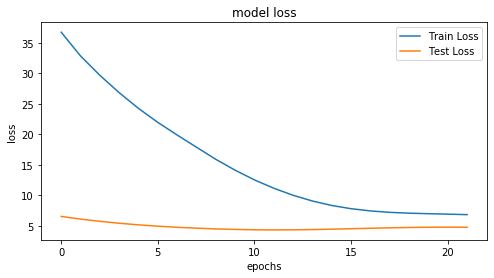

In [86]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))
model_loss(history)


In [92]:
def prediction_plot(testY, test_predict):
    len_prediction=[x for x in range(len(testY))]
    plt.figure(figsize=(8,4))
    plt.plot(len_prediction, testY[:len(len_prediction)], marker='.', label="actual")
    plt.plot(len_prediction, test_predict[:len(test_predict)], 'r', label="prediction")
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Ads Daily Spend', size=15)
    plt.xlabel('Time step', size=15)
    plt.legend(fontsize=15)
    plt.show();
    

ValueError: x and y can be no greater than 2-D, but have shapes (492,) and (492, 1, 30)

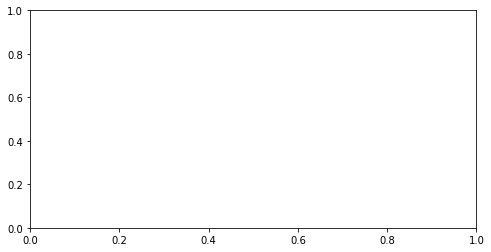

In [93]:
prediction_plot(testX, testY)